# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

In [2]:
gorjetas = sns.load_dataset("tips")
gorjetas.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
gorjetas['tip_pct'] = gorjetas['tip'] / (gorjetas['total_bill'] - gorjetas['tip'])
gorjetas['net_bill'] = gorjetas['total_bill'] - gorjetas['tip']
gorjetas.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [4]:
reg_tip = smf.ols('tip ~ net_bill', data = gorjetas).fit()
reg_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           5.02e-23
Time:                        21:16:32   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.000       0.999       1.662
net_bill       0.0993      0.009     10.980      0.000       0.082       0.117
==============================================================================
Omnibus:                       33.873   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.942
Skew:                           0.754   Prob(JB):                     9.63e-14
Kurtosis:                       4.903   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='net_bill', ylabel='tip'>

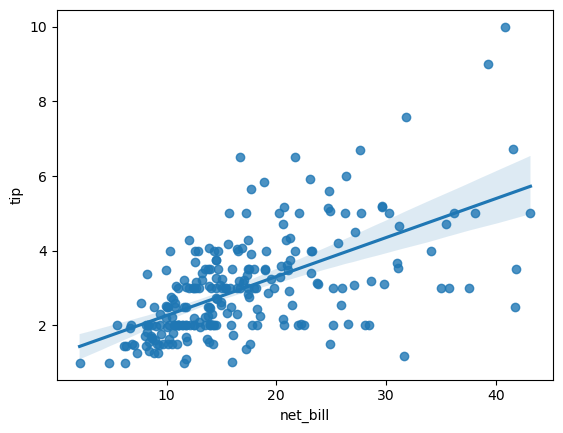

In [5]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = gorjetas[gorjetas['tip_pct']<.5])

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [6]:
reg_tip_pct = smf.ols('tip_pct ~ net_bill', data = gorjetas).fit()
reg_tip_pct.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           1.52e-06
Time:                        21:16:32   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='net_bill', ylabel='tip_pct'>

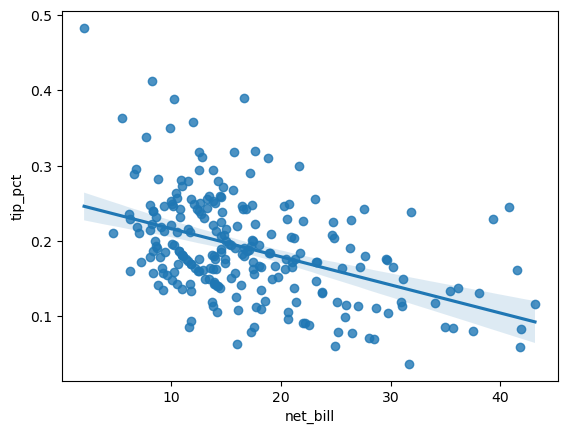

In [7]:
# Gráfico de dispersão
sns.regplot(y = 'tip_pct', x = 'net_bill', data = gorjetas[gorjetas['tip_pct']<.5])

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

O primeiro mostra que conforme o valor pago for maior, a gorjeta aumenta. Já o segundo mostra que quanto maior o valor pago, menor será o percentual da gorjeta.

Ao comparar o R² dos dois modelos, o primeiro modelo parece ser mais confiável por possuir o valor de R² mais próximo de 1 (o valor de R² do primeiro modelo é de 0,333; enquanto que o do segundo é de 0,091).

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [8]:
# 1
pred = reg_tip_pct.fittedvalues
pred

0      0.207087
1      0.251951
2      0.197684
3      0.180107
4      0.176358
         ...   
239    0.163268
240    0.150546
241    0.178264
242    0.206534
243    0.208316
Length: 244, dtype: float64

In [9]:
# 2
tip_pct_pred = reg_tip_pct.fittedvalues

gorjetas["tip_pred"] = tip_pct_pred * gorjetas["net_bill"]
gorjetas

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill,tip_pred
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98,3.309254
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68,2.186938
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51,3.461450
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37,3.668785
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98,3.699998
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166,23.11,3.773120
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428,25.18,3.790751
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759,20.67,3.684707
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899,16.07,3.319003


In [10]:
# 3
modelo_tip = smf.ols("tip ~ tip_pred", data=gorjetas).fit()

r_quadrado_modelo_tip = modelo_tip.rsquared
print(f"R² do modelo para tip: {r_quadrado_modelo_tip}")

R² do modelo para tip: 0.12112385704528728


In [11]:
# 4
r_quadrado_1 = reg_tip.rsquared

print(f"R² do modelo original (reg_tip): {r_quadrado_1}")
print(f"R² do modelo ajustado para tip (usando tip_pred): {r_quadrado_modelo_tip}")

# Comparação direta
if r_quadrado_modelo_tip > r_quadrado_1:
    print("O modelo ajustado para tip (usando tip_pred) tem um ajuste melhor.")
else:
    print("O modelo original (reg_tip) tem um ajuste melhor.")

R² do modelo original (reg_tip): 0.3325407312323705
R² do modelo ajustado para tip (usando tip_pred): 0.12112385704528728
O modelo original (reg_tip) tem um ajuste melhor.
